# KPI Monitoring with AI – CloudWalk Analyst Technical Test

This notebook presents an end-to-end transactional data analysis focused on KPIs such as Total Payment Volume (TPV) and Average Ticket.  
It also includes the implementation of a real AI-based assistant using a machine learning model to monitor daily performance and generate alerts.

Developed as part of the selection process for the Operations Intelligence Analyst position at CloudWalk.

In [1]:
#Loading and Preprocessing the Data

# Reading the dataset
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Operations_analyst_data.csv')

df.head()


Mounted at /content/drive


,day,entity,product,price_tier,anticipation_method,payment_method,installments,amount_transacted,quantity_transactions,quantity_of_merchants
0,2025-01-01,PJ,pix,intermediary,Pix,uninformed,1,546030.68,13361,675
1,2025-01-01,PJ,pos,intermediary,D1Anticipation,credit,1,574568.13,9104,694
2,2025-01-01,PJ,tap,normal,D0/Nitro,credit,1,342178.87,2655,1607
3,2025-01-01,PJ,tap,domination,D1Anticipation,debit,1,1183.21,63,9
4,2025-01-01,PJ,tap,aggressive,D0/Nitro,credit,1,10158.11,30,20


In [2]:
# Check data types, missing values, and column names:
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37787 entries, 0 to 37786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    37787 non-null  object 
 1   entity                 37787 non-null  object 
 2   product                37787 non-null  object 
 3   price_tier             37787 non-null  object 
 4   anticipation_method    37787 non-null  object 
 5   payment_method         37787 non-null  object 
 6   installments           37787 non-null  int64  
 7   amount_transacted      37787 non-null  float64
 8   quantity_transactions  37787 non-null  int64  
 9   quantity_of_merchants  37787 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 2.9+ MB


Index(['day', 'entity', 'product', 'price_tier', 'anticipation_method',
       'payment_method', 'installments', 'amount_transacted',
       'quantity_transactions', 'quantity_of_merchants'],
      dtype='object')

## Business KPIs

**Total Payment Volume (TPV):**  
The TPV represents the total value of transactions processed. Below, we analyze TPV by entity, product, and payment method.

In [3]:
# Business KPIs
# Total Payment Volume (TPV)
df['tpv'] = df['amount_transacted']
tpv_entity = df.groupby('entity')['tpv'].sum().reset_index()
tpv_product = df.groupby('product')['tpv'].sum().reset_index()
tpv_payment = df.groupby('payment_method')['tpv'].sum().reset_index()

### Visualization: Total Payment Volume by Entity Type

This section uses **Seaborn** and **Matplotlib** to visualize the distribution of Total Payment Volume (TPV) across different entity types.

The bar plot provides a clear comparison between entities, helping identify which ones contribute the most to the overall TPV. This insight is valuable for resource allocation and strategic targeting.

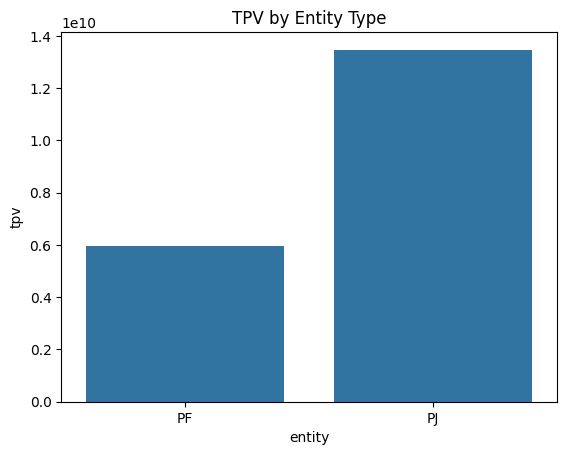

In [4]:
# Visualization with Seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=tpv_entity, x='entity', y='tpv')
plt.title('TPV by Entity Type')
plt.show()

### Visualization: Total Payment Volume by Product

This chart displays the **Total Payment Volume (TPV)** aggregated by product. It helps identify which products are generating the highest transaction volumes.

By sorting the values in descending order, the bar chart highlights the top-performing products, supporting more informed decisions regarding product strategy and prioritization.

Text(0.5, 1.0, 'TPV by Product')

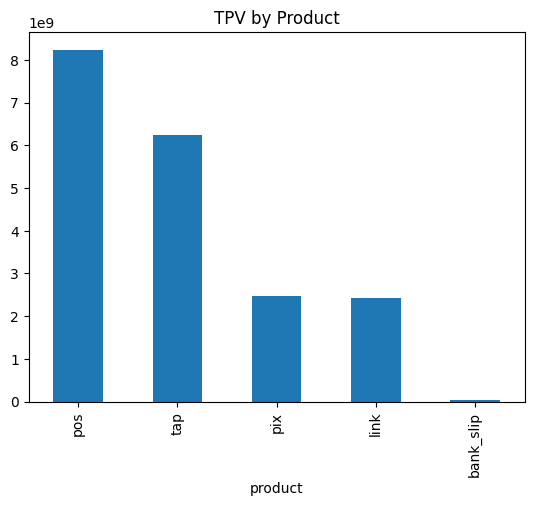

In [5]:
# Visualization with Seaborn:
df.groupby('product')['tpv'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('TPV by Product')

### Average Ticket by Product

This visualization shows the **average transaction value (average ticket)** for each product.  
The average ticket is calculated by dividing the total payment volume (TPV) by the number of transactions.

This metric provides insight into consumer spending behavior per product, helping identify products with higher value-per-sale performance.

Text(0.5, 1.0, 'Average Ticket by Product')

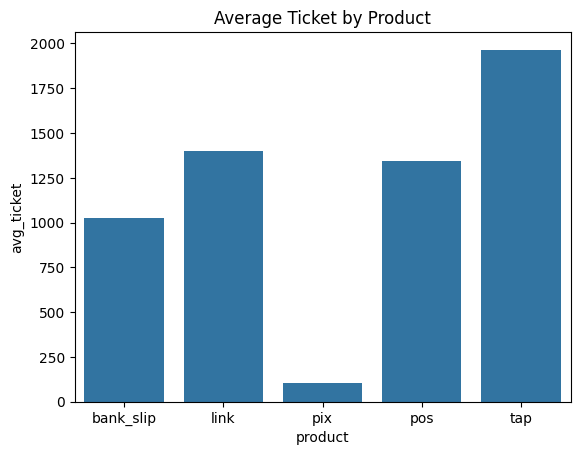

In [6]:
# Average Ticket
df['avg_ticket'] = df['tpv'] / df['quantity_transactions']
avg_ticket = df.groupby('product')['avg_ticket'].mean().reset_index()
sns.barplot(data=avg_ticket, x='product', y='avg_ticket')
plt.title('Average Ticket by Product')

### TPV by Number of Installments

This visualization shows how the Total Payment Volume (TPV) is distributed according to the number of installments. It helps identify whether customers prefer to pay in full or split payments across multiple months.

Understanding the impact of installment behavior is important for evaluating customer purchasing habits and for aligning pricing and credit policies with business strategy.

Text(0.5, 1.0, 'TPV by Number of Installments')

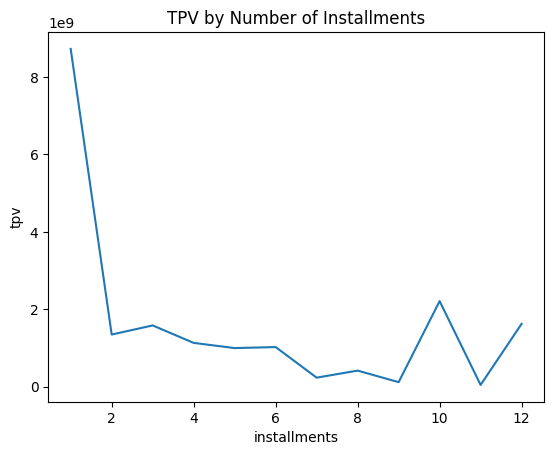

In [7]:
# Transactional Analysis Installments
installments = df.groupby('installments')['tpv'].sum().reset_index()
sns.lineplot(data=installments, x='installments', y='tpv')
plt.title('TPV by Number of Installments')

### TPV by Price Tier

This chart displays the Total Payment Volume (TPV) segmented by price tiers. Price tiers allow us to categorize transactions based on their monetary value ranges (e.g., low, medium, high), helping to uncover how revenue is distributed across different pricing strategies.

This analysis supports decisions around pricing, product positioning, and targeted campaigns for each customer segment.

Text(0.5, 1.0, 'TPV by Price Tier')

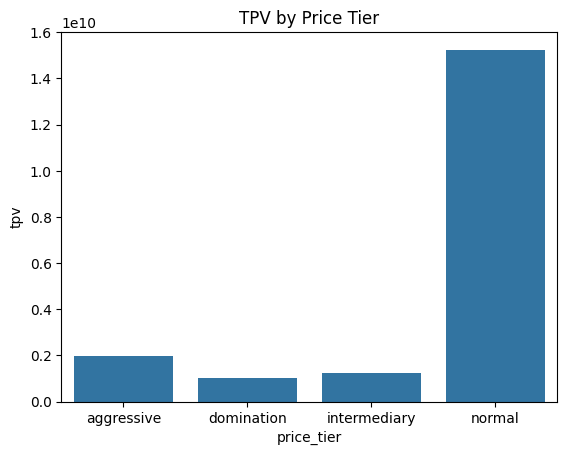

In [8]:
# Price Tier
price_tier = df.groupby('price_tier')['tpv'].sum().reset_index()
sns.barplot(data=price_tier, x='price_tier', y='tpv')
plt.title('TPV by Price Tier')

### Daily TPV Trend

This line chart presents the Total Payment Volume (TPV) aggregated by day. It allows us to visualize the evolution of transaction volume over time and identify patterns such as growth, seasonality, or sudden drops.

Such insights are useful for performance monitoring, campaign impact analysis, and forecasting transaction behavior.

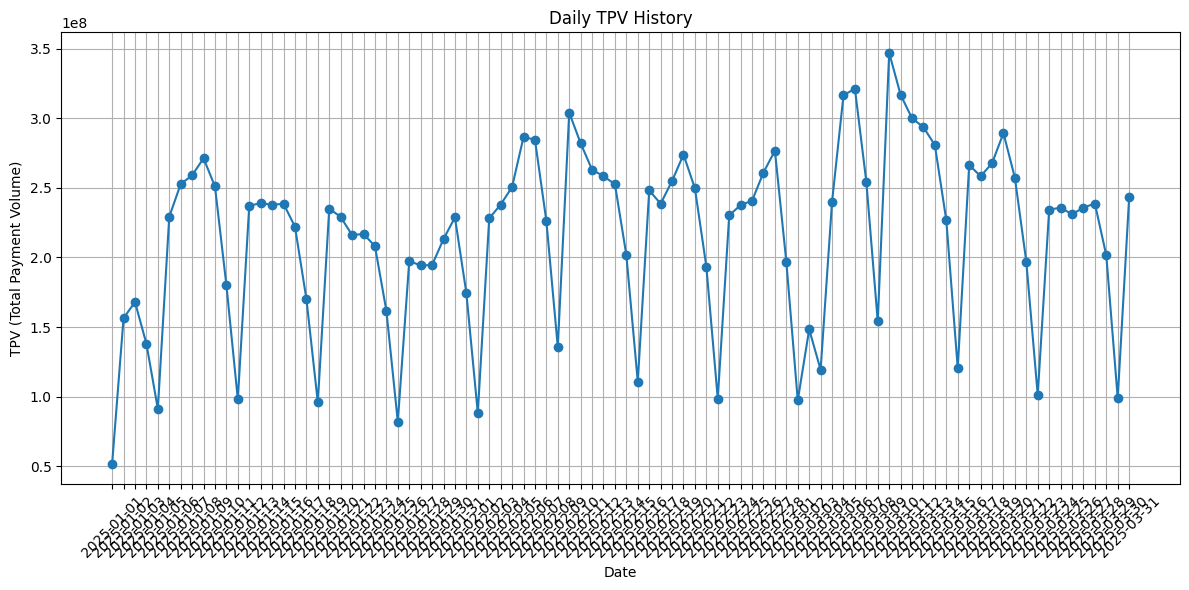

In [9]:
# Group by day and sum TPV
daily_tpv = df.groupby('day')['tpv'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_tpv['day'], daily_tpv['tpv'], marker='o', linestyle='-')
plt.title('Daily TPV History')
plt.xlabel('Date')
plt.ylabel('TPV (Total Payment Volume)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### TPV by Weekday

This bar chart illustrates the Total Payment Volume (TPV) distributed across the days of the week. The weekdays are explicitly ordered from Monday to Sunday to ensure a clear and consistent temporal comparison.

Analyzing TPV by weekday helps uncover behavioral patterns, such as peak transaction days, which are valuable for resource allocation, marketing strategies, and operational planning.

/tmp/ipython-input-10-3431335112.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tpv_weekday = df.groupby('weekday')['tpv'].sum().reset_index()


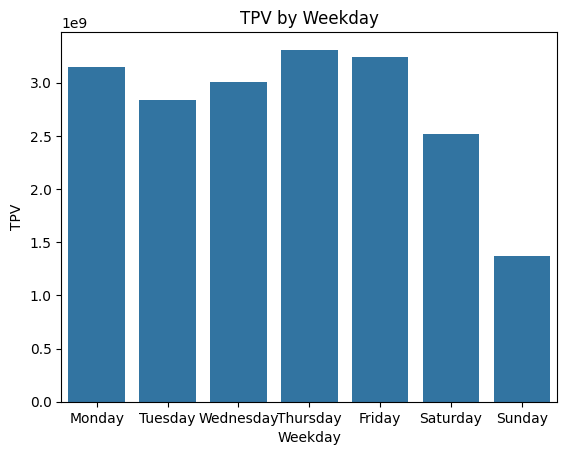

In [10]:
# Weekday vs TPV with ordered weekdays
df['day'] = pd.to_datetime(df['day'])
df['weekday'] = df['day'].dt.day_name()

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'weekday' to a categorical type with the specified order
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

# Group by weekday and sum TPV
tpv_weekday = df.groupby('weekday')['tpv'].sum().reset_index()

# Plot
sns.barplot(data=tpv_weekday, x='weekday', y='tpv')
plt.title('TPV by Weekday')
plt.xlabel('Weekday')
plt.ylabel('TPV')
plt.show()

### Weekly TPV Trend

This line chart presents the evolution of Total Payment Volume (TPV) on a weekly basis. Each point on the graph corresponds to the aggregated TPV for a given ISO week of the year.

By grouping transactions by week, this visualization provides a clearer view of long-term trends, such as growth momentum, seasonality, or unusual weekly spikes or drops that may require further investigation.

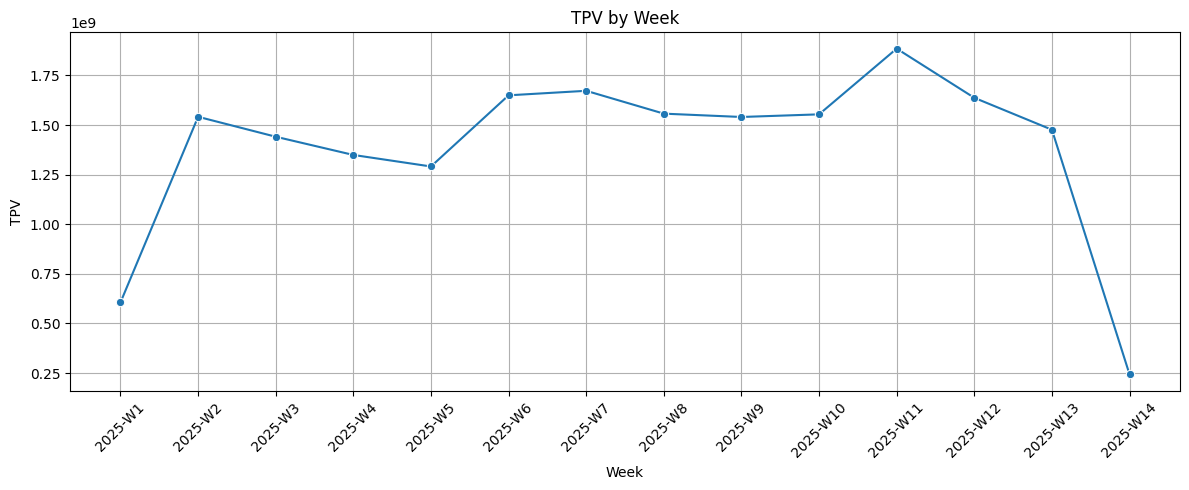

In [11]:
# Create a column with the week number of the year
df["week"] = df["day"].dt.isocalendar().week
df["year"] = df["day"].dt.isocalendar().year

# Group by year and week
weekly_tpv = df.groupby(["year", "week"])["amount_transacted"].sum().reset_index()
weekly_tpv["year_week"] = weekly_tpv["year"].astype(str) + "-W" + weekly_tpv["week"].astype(str)

# Plot the chart
plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_tpv, x="year_week", y="amount_transacted", marker="o")
plt.title("TPV by Week")
plt.xlabel("Week")
plt.ylabel("TPV")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly TPV Overview

This visualization shows the Total Payment Volume (TPV) aggregated by month. It provides a high-level view of the transactional flow over time, allowing for the identification of monthly trends, seasonality, and significant increases or decreases in volume.

This kind of analysis is useful for strategic planning, campaign evaluation, and understanding macro patterns in user behavior.

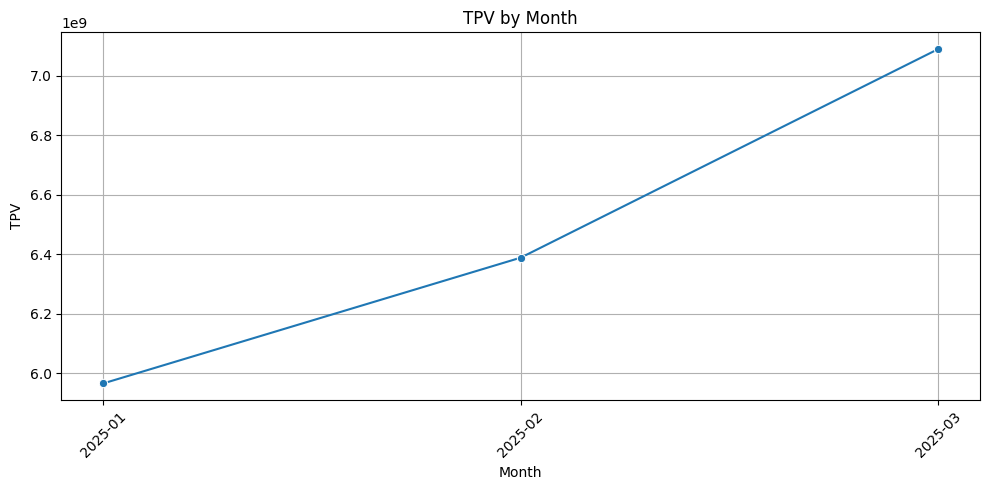

In [12]:
# Create a new column with year and month only
df["year_month"] = df["day"].dt.to_period("M").astype(str)

# Group by month and sum TPV
monthly_tpv = df.groupby("year_month")["amount_transacted"].sum().reset_index()
monthly_tpv.columns = ["Month", "TPV"]

# Plot monthly line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_tpv, x="Month", y="TPV", marker="o")
plt.title("TPV by Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### KPI Visualization: TPV by Product

This bar plot summarizes the Total Payment Volume (TPV) aggregated by product. It helps to identify which products are driving the highest transaction volumes and contributes to strategic prioritization and resource allocation.

The use of the sum estimator aggregates all TPV values per product for a clear comparative view.

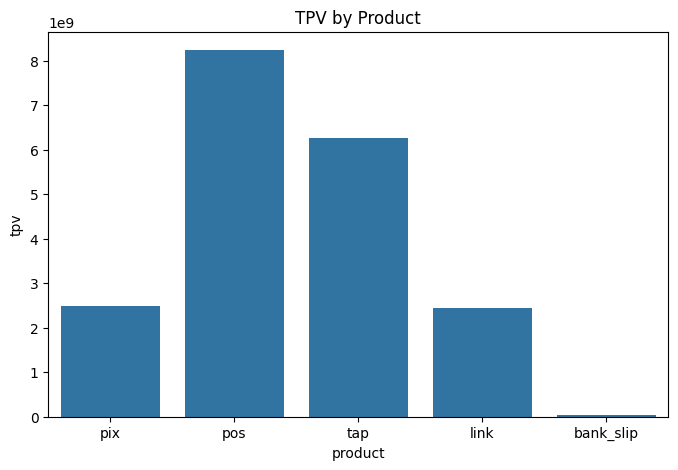

In [13]:
# KPI Visualizations
# TPV by Product
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="product", y="tpv", estimator=sum, errorbar=None)
plt.title("TPV by Product")
plt.show()

### Average Ticket by Payment Method

This bar chart compares the average transaction value (average ticket) across different payment methods. Understanding which payment methods correspond to higher average tickets can guide payment strategy and promotional efforts.

The plot helps reveal customer preferences and spending behavior linked to each payment option.

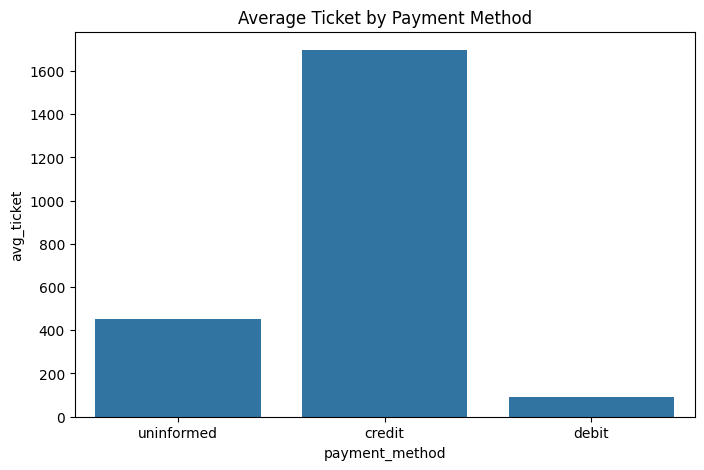

In [14]:
# Comparison by Payment Method:
# Average Ticket by Payment Method
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="payment_method", y="avg_ticket", errorbar=None)
plt.title("Average Ticket by Payment Method")
plt.show()

### TPV by Number of Installments

This boxplot illustrates the distribution of Total Payment Volume (TPV) according to the number of installments chosen by customers.

It highlights how transaction volumes vary with different installment counts, helping to understand customer payment preferences and their impact on revenue.

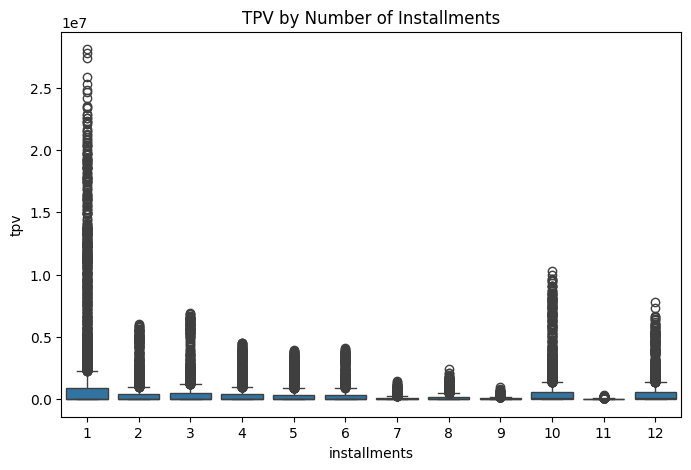

In [15]:
# Installments vs Volume:
# Volume by Number of Installments
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="installments", y="tpv")
plt.title("TPV by Number of Installments")
plt.show()

### Data Preprocessing

We convert the `day` column to datetime format and aggregate key features per day, such as:
- Total Payment Volume (TPV)
- Average ticket
- Number of transactions
- Average number of installments

This dataset will be used to train the machine learning model.

In [16]:
# Preprocessing and Target Creation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ensure 'day' column is datetime
df['day'] = pd.to_datetime(df['day'])

### Creating the Target Variable

We calculate the daily TPV and classify each day as:
- **1**: TPV is below the historical average → indicates underperformance
- **0**: TPV is at or above average → normal performance

This binary variable will serve as the model's target.


In [17]:
# Calculate daily TPV
daily_tpv = df.groupby('day')['amount_transacted'].sum().reset_index()
daily_tpv.columns = ['day', 'daily_tpv']

# Create binary target: 1 if TPV is below the overall average
tpv_mean = daily_tpv['daily_tpv'].mean()
daily_tpv['tpv_below_avg'] = (daily_tpv['daily_tpv'] < tpv_mean).astype(int)

# Aggregate features by day
features = df.groupby('day').agg({
    'quantity_transactions': 'sum',
    'amount_transacted': 'sum',
    'installments': 'mean',
    'avg_ticket': 'mean'
}).reset_index()

# Merge features with target
dataset = pd.merge(features, daily_tpv, on='day')

# Add weekday as categorical variable
dataset['weekday'] = dataset['day'].dt.day_name()
dataset = pd.get_dummies(dataset, columns=['weekday'], drop_first=True)

### Model Training with Random Forest

We use a Random Forest Classifier to predict whether the TPV for a given day will fall below the historical average, based on input features.

The dataset is split into training and test sets. Model performance is evaluated using:
- Confusion Matrix
- Precision, Recall, and F1 Score

In [18]:
#Model Training (Random Forest)

# Define features (X) and target (y)
X = dataset.drop(columns=['day', 'daily_tpv', 'tpv_below_avg'])
y = dataset['tpv_below_avg']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0]
 [ 0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### Feature Importance

We analyze which features contributed the most to the model's predictions.  
This helps to understand the behavior of TPV over time and supports data-driven decision-making.


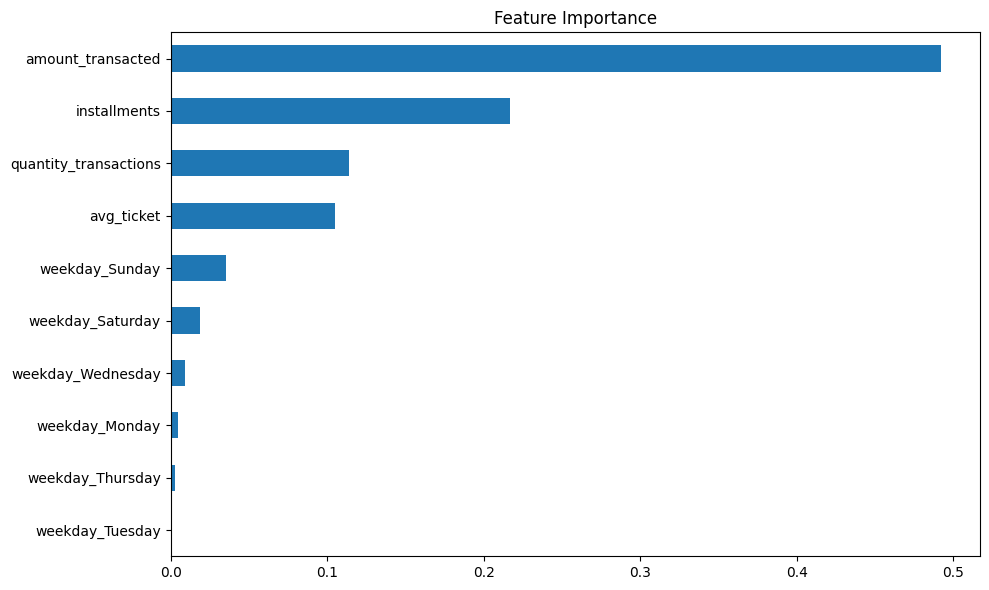

In [19]:
#Feature Importance (Explainability)

# Visualize feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

### Real-Time Prediction (AI Assistant Simulation)

As a simulation of an intelligent assistant, the model is used to predict the expected TPV performance for the latest available day.

If the prediction indicates below-average TPV, an alert message is displayed. Otherwise, the assistant confirms normal performance.


In [20]:
#Example of Real-Time Prediction (Intelligent Assistant Style)

# Simulate prediction for the most recent day
latest = X.tail(1)
pred = model.predict(latest)[0]

if pred == 1:
    print("Alert: The predicted TPV is below average. Consider reviewing product performance or engagement campaigns.")
else:
    print("TPV is expected to be within or above average range.")


TPV is expected to be within or above average range.


### Summary of the AI Assistant

This implementation demonstrates the use of machine learning to automate daily performance monitoring.  
The assistant can be extended to:
- Send alerts via email, Slack, or dashboards
- Track trends over time
- Support business decision-making in real time